# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
import numpy as np

In [ ]:
def linan():
  input_message = "Enter 3 numbers separated by space: "
  first_equation = np.array(input(input_message).split()).astype(float)
  second_equation = np.array(input(input_message).split()).astype(float)

  system_coefficients = np.array([first_equation[0:2], second_equation[0:2]])
  constant_terms = np.array([first_equation[2], second_equation[2]])

  unknowns = np.linalg.solve(system_coefficients, constant_terms)

  print("\nResult:\n", unknowns[0], unknowns[1])

# enter you code
linan()

Enter 3 numbers separated by space: 1 2 3
Enter 3 numbers separated by space: 4 5 6

Result:
 -1.0 2.0


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(n):
  matrix = np.zeros(shape=(n, n))
  matrix[:, 0] = 1
  matrix[:, n - 1] = 1
  matrix[0, :] = 1
  matrix[n - 1, :] = 1
  return matrix

n = int(input("Enter number: "))

print("\nResult:\n", repr(decorate_matrix(n)))

Enter number: 5

Result:
 array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
def f(a, b):
  return lambda x: (x + a)**2 - b

def g(a, b):
  return lambda x: np.abs(f(a, b)(x))

def dichotomy(function, a, b, left_limit, right_limit):
  argument = (left_limit + right_limit) / 2
  epsilon = 0.001
  while np.abs(right_limit - left_limit) > epsilon:
    first_value = function(a, b)(argument - epsilon / 2)
    second_value = function(a, b)(argument + epsilon / 2)
    if first_value <= second_value:
      right_limit = argument - epsilon / 2;
    else:
      left_limit = argument + epsilon / 2;
    argument = (right_limit + left_limit) / 2;
  return argument

In [ ]:
a, b = map(float, input("Enter 2 numbers: ").split())

f_min = round(float(dichotomy(f, a, b, -5, 5)), 1)
g_min = [round(float(dichotomy(g, a, b, f_min, 5)), 1)]
g_min.append(round(float(dichotomy(g, a, b, -5, f_min)), 1))

print(f_min, g_min[0])

Enter 2 numbers: 3 4
-3.0 -1.0


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_drow(function, a, b, min_value):
  x = np.linspace(-10, 10, 100)
  y = list(map(function(a, b), x))

  plt.plot(x, y)
  plt.ylabel("Y")
  plt.xlabel("X")
  for value in min_value:
    plt.scatter(value, function(a, b)(value), c='#000000')

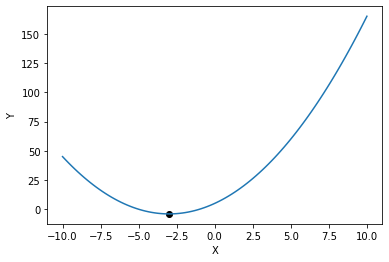

In [ ]:
plot_drow(f, a, b, [f_min])

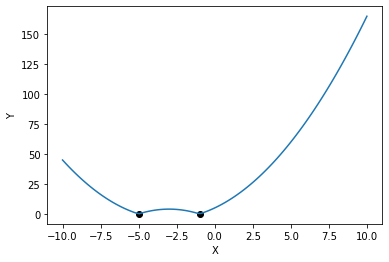

In [ ]:
plot_drow(g, a, b, g_min)

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой сторой (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)?

In [ ]:
def C(n, k): 
  return np.math.factorial(n) / (np.math.factorial(n-k) * np.math.factorial(k))

In [ ]:
p = 2 / 2**10
q = 1 - p
P = 0

for i in range(1, 1001):
  P += C(1000, i) * p**i * q**(1000-i)

print("Result:", round(P, 4))

Result: 0.8584


In [ ]:
human_count = 1000
combination_count = 5
# A = PPPPPPPP
# OOA
# OAO
# AOO
# POA
# AOP
money_probability = 2 / 2**10
inverse_probability = 1 - money_probability * combination_count
probability = 1 - (inverse_probability) ** human_count

print("Result:", round(probability, 4))

Result: 0.9999


In [ ]:
p = 2 / 2**10
q = 1 - p
P = C(1000, 3) * p**3 * q**(1000-3)

print("Result:", round(P, 4))

Result: 0.1763
